In [1]:
import numpy as np
import pandas as pd 
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/harrypotter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
import re

def clean_review_format(review):
    review = review.lstrip("\ufeff")  # Remove BOM if present
    review = re.sub(r'^\d+\.\s*', '', review).strip()  # Remove numbering
    if not review.startswith('"'):
        review = '"' + review  # Add starting quote if missing
    if not review.endswith('"'):
        review = review + '"'  # Add ending quote if missing
    return review[1:-1]

with open("reviews.txt", "r", encoding="utf-8-sig") as file:  # Use utf-8-sig to remove BOM automatically
    reviews = [clean_review_format(line) for line in file.readlines()]

# Print first few reviews to check
reviews

["Absolutely breathtaking views and fantastic skiing conditions! Can't wait to come back next winter.",
 'The lodge was cozy, and the staff was incredibly friendly. Highly recommend the hot cocoa by the fire!',
 'Mountain biking trails were well-maintained, and the rental equipment was top-notch.',
 'Loved the guided nature walk. Learned so much about the local wildlife!',
 'The zip-lining course was thrilling, and the instructors were very professional.',
 'Great family-friendly experience, from sledding to the indoor climbing walls.',
 'The après-ski experience was perfect. Live music, good food, and amazing views!',
 'Fantastic ski-in/ski-out accommodations. Super convenient!',
 'Staff went above and beyond to make sure our experience was unforgettable.',
 'The spa was a much-needed relaxation spot after a long day of skiing.',
 'Lift lines were long, but the trails were excellent once we got up the mountain.',
 'Food was overpriced for the quality. Not many budget-friendly options.

In [3]:
infrastructure_keywords = {
    "lodging", "room", "rooms", "heating", "wifi", "wi-fi", "signage", "lift", "lifts", "parking",
    "restrooms", "facilities", "cabin", "infrastructure", "trail","trails", "paths", "accommodation",
    "lighting", "cleanliness", "spa", "maintenance", "seating", "stairs", "walkway", "bathrooms",
    "lodge", "accomodation", "gondola", "accomodations", "cabin"
}

operational_keywords = {
    "staff", "service", "customer", "friendly", "rude", "wait time", "pricing", "expensive", "cheap",
    "ordering", "reservation", "checkout", "rental", "food", "restaurant", "menu", "waiter", "chef",
    "entertainment", "activity", "experience", "event", "atmosphere", "management", "assistance", 
    "emergency", "rescue", "response", "security", "patrol", "lesson","lessons", "guide","guides", "instructor", "instructors"
    "tour", "course", "courses"
}

In [4]:

# Function to classify reviews
def classify_review(review):
    words = set(word_tokenize(review.lower()))  # Convert to lowercase and tokenize
    infra_match = words.intersection(infrastructure_keywords)
    ops_match = words.intersection(operational_keywords)
    
    if len(infra_match) > len(ops_match):
        return "Infrastructure"
    elif len(ops_match) > len(infra_match):
        return "Operational"
    else:
        if len(infra_match) > 0:
            return "Infrastructure"
        if len(ops_match) > 0:
            return "Operational"
        else: 
            return "Uncategorized"


In [5]:
classified_reviews = [(review.strip(), classify_review(review)) for review in reviews]

# Convert to DataFrame
df = pd.DataFrame(classified_reviews, columns=["Review", "Category"])
df.head()

,Review,Category
0,Absolutely breathtaking views and fantastic sk...,Uncategorized
1,"The lodge was cozy, and the staff was incredib...",Operational
2,"Mountain biking trails were well-maintained, a...",Infrastructure
3,Loved the guided nature walk. Learned so much ...,Uncategorized
4,"The zip-lining course was thrilling, and the i...",Operational


In [6]:
df.groupby("Category").size().reset_index()

,Category,0
0,Infrastructure,205
1,Operational,248
2,Uncategorized,72


In [7]:
infra_reviews = df[df['Category']=='Infrastructure']    
oper_reviews = df[df['Category']=='Operational']
other_reviews = df[df['Category']=='Uncategorized']


In [8]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment_scores = sia.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
infra_reviews.loc[:, 'Sentiment'] = infra_reviews['Review'].apply(analyze_sentiment)
oper_reviews.loc[:, 'Sentiment'] = oper_reviews['Review'].apply(analyze_sentiment)
other_reviews.loc[:, 'Sentiment'] = other_reviews['Review'].apply(analyze_sentiment)

/var/folders/gp/r9106f0d7cv0pg55j8gs_g7h0000gn/T/ipykernel_44188/1584706145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infra_reviews.loc[:, 'Sentiment'] = infra_reviews['Review'].apply(analyze_sentiment)
/var/folders/gp/r9106f0d7cv0pg55j8gs_g7h0000gn/T/ipykernel_44188/1584706145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oper_reviews.loc[:, 'Sentiment'] = oper_reviews['Review'].apply(analyze_sentiment)
/var/folders/gp/r9106f0d7cv0pg55j8gs_g7h0000gn/T/ipykernel_44188/1584706145.py:3: Settin

In [10]:
infra_reviews.groupby('Sentiment').size().reset_index()

,Sentiment,0
0,Negative,74
1,Neutral,10
2,Positive,121


In [11]:
oper_reviews.groupby('Sentiment').size().reset_index()

,Sentiment,0
0,Negative,33
1,Neutral,7
2,Positive,208


In [12]:
other_reviews.groupby('Sentiment').size().reset_index()

,Sentiment,0
0,Negative,2
1,Neutral,7
2,Positive,63


In [13]:
infra_negative = infra_reviews[infra_reviews['Sentiment'] == 'Negative']
infra_negative.head()


,Review,Category,Sentiment
22,Ski lifts were old and slow. Desperately need ...,Infrastructure,Negative
31,The gondola was outdated and kept stopping mid...,Infrastructure,Negative
36,"We had a great stay, but the parking situation...",Infrastructure,Negative
46,The lodge’s heating system needs an upgrade—it...,Infrastructure,Negative
65,The ski lifts need serious upgrades.,Infrastructure,Negative


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download required NLTK data if not already present
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrypotter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harrypotter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

def extract_complaints(reviews, ngram_range=(1, 2), top_n=10, num_topics=3):
    """
    Extracts key complaints from a list of negative reviews.
    
    Parameters:
    - reviews (list): List of customer reviews.
    - ngram_range (tuple): Range of n-grams (default is (1,2) for unigrams & bigrams).
    - top_n (int): Number of most frequent phrases to return.
    - num_topics (int): Number of topics for LDA topic modeling.
    
    Returns:
    - complaints (dict): Dictionary containing top n-grams, TF-IDF phrases, and topics.
    """
    
    # Preprocess function to clean and tokenize text
    def preprocess(text):
        text = text.lower()  # Lowercase
        tokens = word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
        tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
        return tokens
    
    # Apply preprocessing to all reviews
    tokenized_reviews = [preprocess(review) for review in reviews]

    # Flatten all words into a single list
    all_words = [word for review in tokenized_reviews for word in review]

    # Extract n-grams (bigrams and trigrams)
    bigrams = list(ngrams(all_words, 2))
    trigrams = list(ngrams(all_words, 3))

    # Count the most common n-grams
    bigram_counts = Counter(bigrams).most_common(top_n)
    trigram_counts = Counter(trigrams).most_common(top_n)

    # Convert tokenized reviews back to text for TF-IDF
    cleaned_reviews = [" ".join(tokens) for tokens in tokenized_reviews]

    # Apply TF-IDF to extract important complaint phrases
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=top_n * 2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)
    important_phrases = tfidf_vectorizer.get_feature_names_out()

    # Topic Modeling using LDA
    count_vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2), max_features=1000)
    X = count_vectorizer.fit_transform(cleaned_reviews)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)

    words = count_vectorizer.get_feature_names_out()
    topics = {f"Topic {i+1}": [words[idx] for idx in topic.argsort()[-10:]] for i, topic in enumerate(lda.components_)}

    # Return all extracted complaint insights
    complaints = {
        "Top Bigrams": bigram_counts,
        "Top Trigrams": trigram_counts,
        "Important Phrases (TF-IDF)": important_phrases,
        "Complaint Topics (LDA)": topics
    }
    
    return complaints

    

In [16]:
results = extract_complaints(infra_negative['Review']) 
for key, value in results.items():
    print(f"\n{key}:")
    print(value)
    


Top Bigrams:
[(('need', 'invest'), 18), (('invest', 'better'), 18), (('way', 'high'), 10), (('everything', 'felt'), 10), (('felt', 'overpriced'), 10), (('quality', 'provided'), 10), (('hard', 'justify'), 10), (('justify', 'cost'), 10), (('cost', 'get'), 10), (('trails', 'poorly'), 10)]

Top Trigrams:
[(('need', 'invest', 'better'), 18), (('everything', 'felt', 'overpriced'), 10), (('hard', 'justify', 'cost'), 10), (('justify', 'cost', 'get'), 10), (('trails', 'poorly', 'marked'), 10), (('poorly', 'marked', 'ended'), 10), (('marked', 'ended', 'getting'), 10), (('ended', 'getting', 'lost'), 10), (('getting', 'lost', 'hike'), 10), (('lost', 'hike', 'frustrating'), 10)]

Important Phrases (TF-IDF):
['activities' 'better' 'could' 'disappointing' 'facilities' 'get' 'hard'
 'high' 'invest' 'invest better' 'lodge' 'lodging' 'lost' 'need'
 'need invest' 'outdated' 'poorly' 'price' 'resort' 'trails']

Complaint Topics (LDA):
{'Topic 1': ['drawback', 'drawback lack', 'especially', 'especially fa

In [17]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

def extract_complaints_bertopic(reviews, min_topic_size=5):
    """
    Uses BERTopic to extract complaint topics from reviews with improved stopword handling and better topic grouping.

    Parameters:
    - reviews (list): A list of customer complaints.
    - min_topic_size (int): The minimum number of similar complaints required to form a topic.

    Returns:
    - DataFrame containing topic information.
    """
    # Define custom stopwords to remove generic words
    custom_stopwords = stopwords.words('english') + ["the", "is", "was", "were", "are", "to", "from", "for", "you", "felt", "what"]

    # Use CountVectorizer with improved stopword removal
    vectorizer_model = CountVectorizer(stop_words=custom_stopwords, ngram_range=(1, 2))

    # Run BERTopic with optimized settings
    topic_model = BERTopic(vectorizer_model=vectorizer_model, min_topic_size=min_topic_size)

    # Fit and transform the reviews
    topics, _ = topic_model.fit_transform(reviews)

    # Retrieve topic info as a DataFrame
    topic_info = topic_model.get_topic_info()

    return topic_info

/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
result_ber = extract_complaints_bertopic(infra_negative['Review'])
pd.set_option('display.max_columns', None) 
for key, value in result_ber.items():
    print(f"\n{key}:")
    print(value)
    


Topic:
0    0
1    1
2    2
3    3
Name: Topic, dtype: int64

Count:
0    23
1    23
2    16
3    12
Name: Count, dtype: int64

Name:
0                         0_trails_poorly_resorts_lost
1               1_resorts_outdated_accommodations_lack
2    2_lodge_great lodge_dirty_facilities disappoin...
3           3_hard justify_overpriced_provided_quality
Name: Name, dtype: object

Representation:
0    [trails, poorly, resorts, lost, signage, hike,...
1    [resorts, outdated, accommodations, lack, room...
2    [lodge, great lodge, dirty, facilities disappo...
3    [hard justify, overpriced, provided, quality, ...
Name: Representation, dtype: object

Representative_Docs:
0    [The resort’s trails were poorly marked, and w...
1    [The resort’s remote location is beautiful but...
2    [The winter activities were great, but the lod...
3    [The resort’s prices are way too high for the ...
Name: Representative_Docs, dtype: object


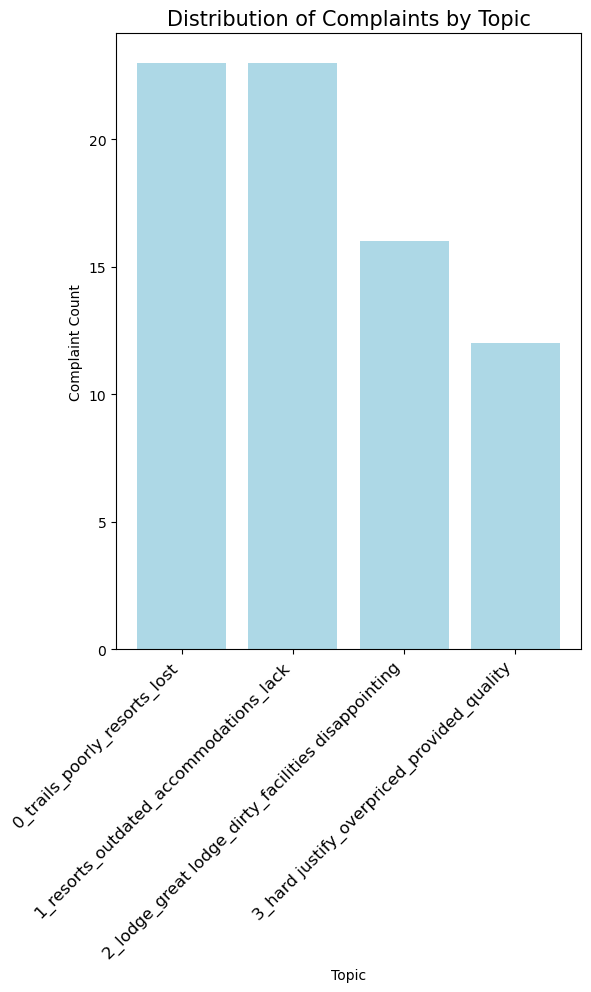

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Creating a bar chart for topic distribution
plt.figure(figsize=(6, 8))
plt.bar(result_ber["Topic"], result_ber["Count"], color='lightblue')
plt.xlabel("Topic")
plt.ylabel("Complaint Count")
plt.title("Distribution of Complaints by Topic", fontsize=15)
plt.xticks(result_ber["Topic"], result_ber["Name"], rotation=45, ha="right", fontsize=12)
plt.show()

# Generate a word cloud for better understanding of key complaint words
# all_words = " ".join([" ".join(words) for words in result_ber["Representation"]])

# wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.title("Common Complaint Words")
# plt.show()

In [21]:
def count_multiple_word_occurrences(words, sentences):
    """
    Counts the occurrences of multiple words in a list of sentences,
    even when multiple sentences exist within a single list element.

    Parameters:
    - words (list of str): The words to count.
    - sentences (list of str): The list of sentence strings.

    Returns:
    - dict: A dictionary with words as keys and their total occurrences as values.
    """
    # Normalize words to lowercase for case-insensitive matching
    words = [word.lower() for word in words]
    extended_sentences = []

    # Split each sentence element into individual sentences
    for sentence in sentences:
        extended_sentences.extend(sentence.split('. '))  # Splitting based on period + space

    # Initialize a dictionary to store word counts
    total_count = 0

    # Count occurrences of each word
    for sentence in extended_sentences:
        sentence_words = sentence.lower().split()
        for word in words:
            total_count += sentence_words.count(word)

    return total_count


sentences = infra_negative['Review']
words_to_count = ["lodge", "rooms", "room", "cabin", 'lodges']
result = count_multiple_word_occurrences(words_to_count, sentences)

# Display result
result


28

In [24]:
sentences = infra_negative['Review']
words_to_count = ['trail', 'trails','lost']
result = count_multiple_word_occurrences(words_to_count, sentences)
result

31

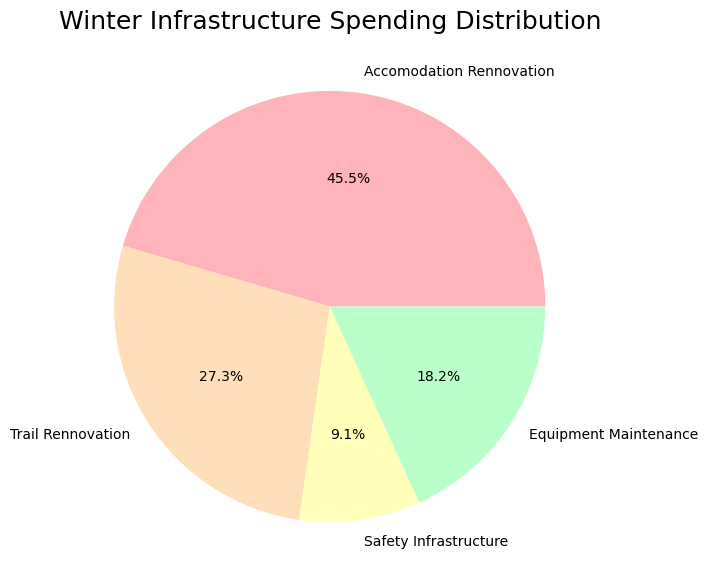

In [75]:
categories = ["Accomodation Rennovation", "Trail Rennovation", "Safety Infrastructure", "Equipment Maintenance"]
values = [1200000*0.5, 1200000*0.3, 1200000*0.1, 1200000*0.2]
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9"]
# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=pastel_colors)

# Title
plt.title("Winter Infrastructure Spending Distribution", fontsize=18)

# Show plot
plt.show()


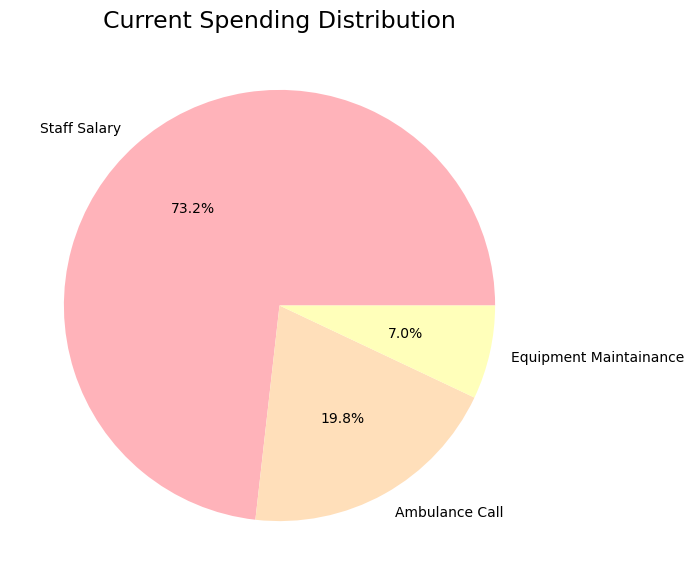

In [64]:
categories = ["Staff Salary", "Ambulance Call", "Equipment Maintainance"]
values = [2503121, 675590, 240142]
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA"]
# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=pastel_colors)

# Title
plt.title("Current Spending Distribution",fontsize=17)

# Show plot
plt.show()
